In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.width', 200)
pd.set_option('display.max_columns', None)

## EDA

- customerID : Customer ID
- gender : Whether the customer is a male or a female
- SeniorCitizen : Whether the customer is a senior citizen or not (1, 0)
- Partner : Whether the customer has a partner or not (Yes, No)
- Dependents : Whether the customer has dependents or not (Yes, No)
- tenure : Number of months the customer has stayed with the company
- PhoneService : Whether the customer has a phone service or not (Yes, No)
- MultipleLines : Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService : Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity : Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup : Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection : Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport : Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV : Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies : Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract : The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling : Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges : The amount charged to the customer monthly
- TotalCharges : The total amount charged to the customer
- Churn : Whether the customer churned or not (Yes or No)

### 기본 분포 확인

In [8]:
# https://www.kaggle.com/datasets/blastchar/telco-customer-churn
df_raw = pd.read_csv("../data/Telco-Customer-Churn.csv")
df_raw.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
# 결측치 없음
df_raw.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

- Yes, No로 되어 있는 Target feature Churn을 1, 0 으로 인코딩

In [11]:
df1 = df_raw.copy()
df1['Churn'] = df1['Churn'].replace({'Yes':1, "No":0})

- object인 TotalCharges를 float으로 변경
- "" 이 입력된 데이터 있음
- "" 이 입력된 데이터 모두 tenure = 0
- 따라서 "" 는 0 으로 변환

In [23]:
df1['TotalCharges'] = pd.to_numeric(df1['TotalCharges'], errors='coerce')
df1['TotalCharges'] = df1['TotalCharges'].replace(np.nan, 0)

- 이탈 고객 비율뿐만 아니라 이탈로 인한 손해도 확인
- Churn * MonthlyCharges 한 Loss 컬럼 생성

In [25]:
df1['Loss'] = df1['Churn'] * df1['MonthlyCharges']
df1['Loss']

0        0.00
1        0.00
2       53.85
3        0.00
4       70.70
        ...  
7038     0.00
7039     0.00
7040     0.00
7041    74.40
7042     0.00
Name: Loss, Length: 7043, dtype: float64

In [26]:
df1['Loss'].sum()

139130.84999999998

- 연속형 변수 : tenure, MonthlyCharges, TotalCharges, Loss
- 범주형 변수 : 나머지
    - 고객의 demographics인 gender, SeniorCitizen, Partner, Dependents
    - 고객이 가입한 서비스와 관련된 PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies
    - 요금 납부와 관련된 Contract, PaperlessBilling, PaymentMethod
    - CustomerID는 고객마다 부여된 고유의 id로 분석에 유의미할 것 같지 않음

### Target Variable : Churn
- 전체 Churn 고개 1869명
- Churn 아닌 고객과 Churn인 고객의 비율 = 73 : 27

In [10]:
df1['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

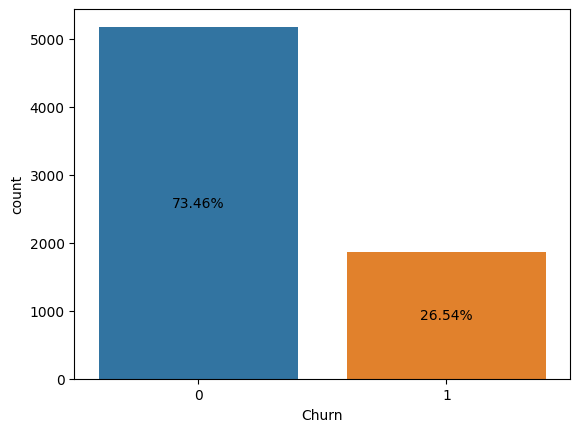

In [12]:
ax = sns.countplot(data=df1, x='Churn')
ax.bar_label(ax.containers[0],
             labels=[f"{x*100:.2f}%" for x in [1-df1['Churn'].mean(), df1['Churn'].mean()]],
             label_type='center')
plt.show()

- 범주형 변수 EDA 용 함수 정의

In [32]:
def eda_cat(col) :
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
    axes[0].set_title(f"Number of customers by {col}")
    cnt = sns.countplot(data=df1, x=col, ax=axes[0],
                       order=sorted(df1[col].unique()))
    cnt.bar_label(cnt.containers[0],
                 labels=[f"{x*100/len(df1):.2f}%" for x in df1[col].value_counts().sort_index()],
                 label_type='center')
    axes[1].set_title(f"Churn ratio by {col}")
    by_churn = sns.barplot(data=df1, x=col, y='Churn', ax=axes[1],
                           order=sorted(df1[col].unique()))
    by_churn.bar_label(by_churn.containers[0],
                       labels=[f"{x*100:.2f}%" for x in df1.groupby(col)['Churn'].mean()],
                       label_type='center')
    loss = plt.pie(df1.groupby(col)['Loss'].sum(),
                   labels=sorted(df1[col].unique()),
                   autopct='%1.2f%%')
    axes[2].set_title(f"Churn loss by {col}")
    plt.show()

### Demographics

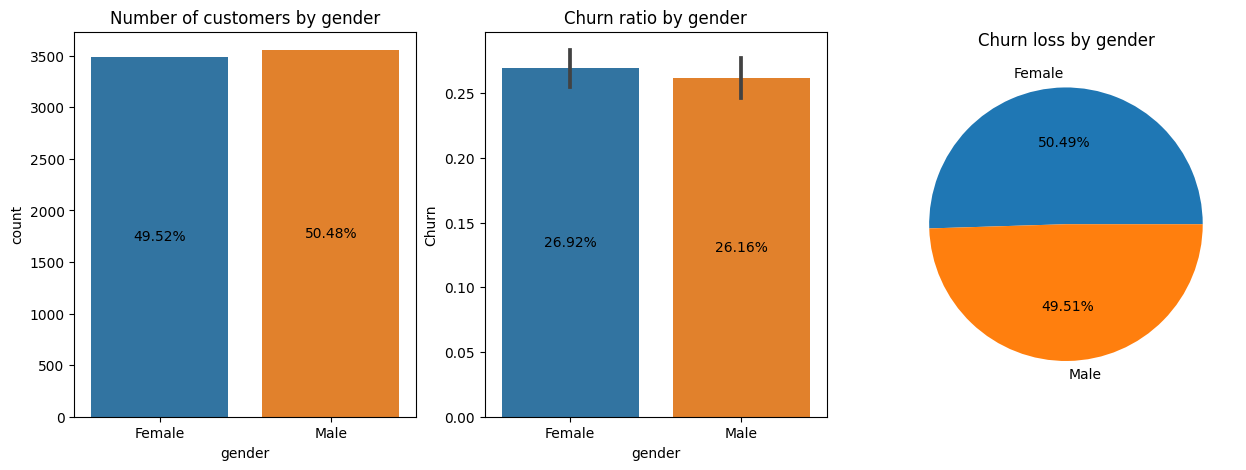

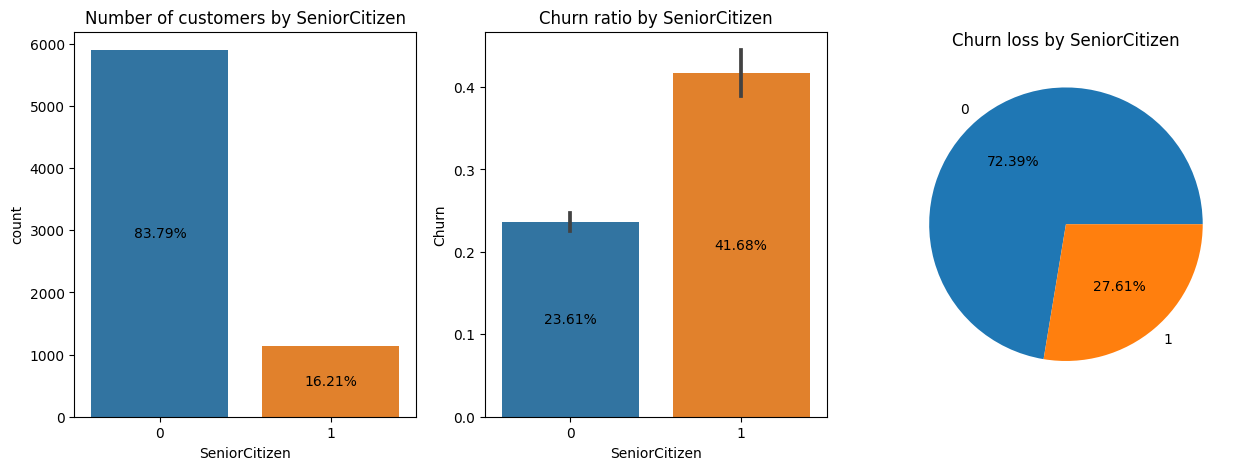

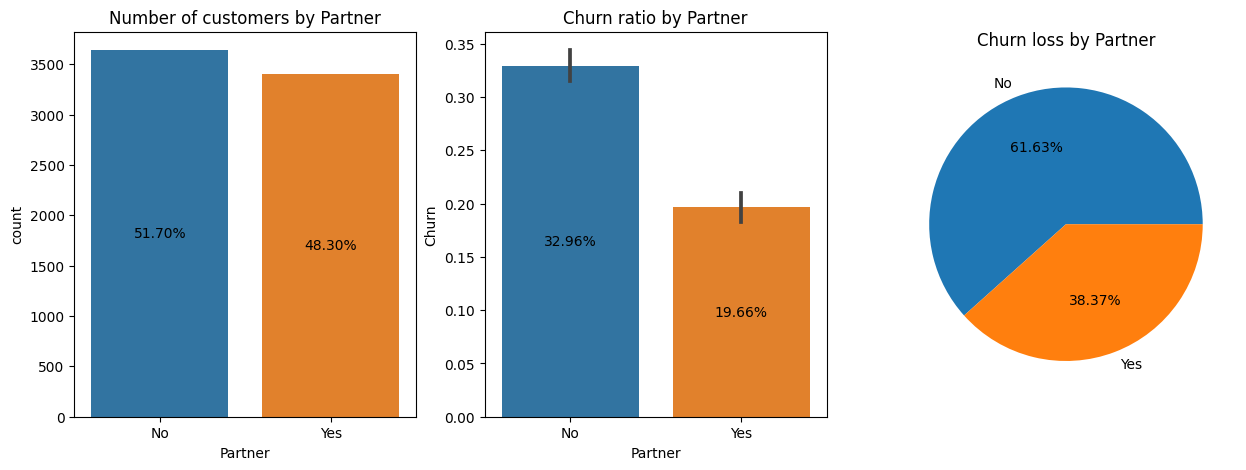

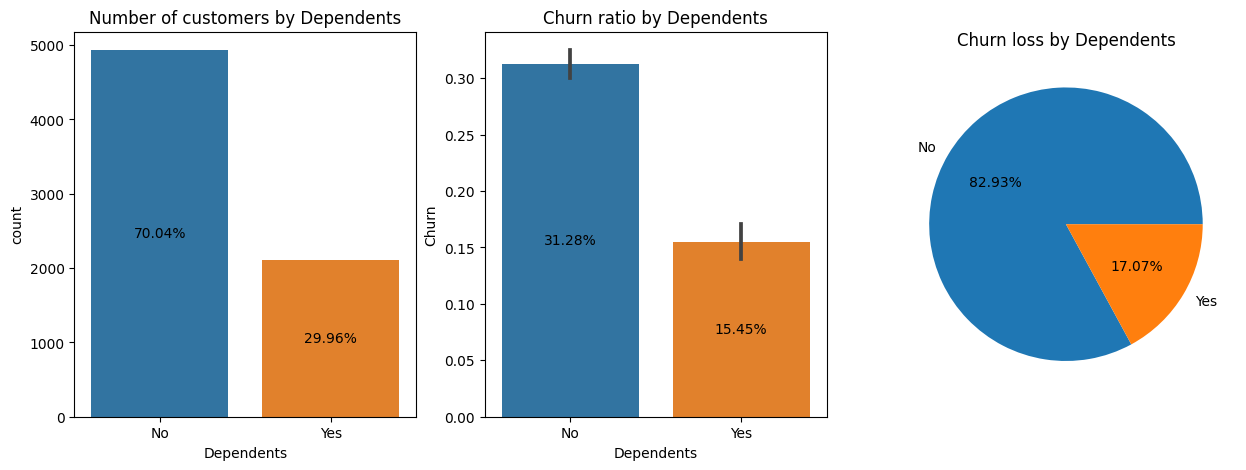

In [14]:
demographics = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
for feature in demographics :
    eda_cat(feature)

#### gender
- 여성 고객 50%, Churn 비율 27%
- 남성 고객 50%, Churn 비율 26%
- 여성 고객의 Churn 비율이 약간 더 높지만 거의 차이 없음
- Loss도 큰 차이 없음

#### SeniorCitizen
- 노인 고객 16%, Churn 비율 42%
- 노인 아닌 고객 84%, Churn 비율 24% 
- 노인 고객의 Churn 비율이 더 높음
- 그러나 Loss는 노인 고객이 훨씬 큼

#### Partner
- 배우자가 없는 고객 52%, Churn 비율 33%
- 배우자가 있는 고객 48%, Churn 비율 20%
- 배우자가 없는 고객의 Churn 비율이 더 높음
- 고객 비율도, Churn 비율도 더 높기 때문에 배우자가 없는 고객의 Loss 더 큼

#### Dependents
- 피부양자가 있는 고객 30%, Churn 비율 15%
- 피부양자가 없는 고객 70%, Churn 비율 31%
- 피부양자가 없는 고객의 Churn 비율이 더 높음
- 피부양자가 없는 고객은 전체 고객 중 비중도 높고, Churn 비율도 높아서 주목할 고객군

#### Dependents & Partner
- 피부양자가 없고 배우자가 없는 고객 중 Churn 고객은 1123명
- 전체 Churn 고객 1869명 중 60% 차지
- 전체 Loss 중 58.01% 차지

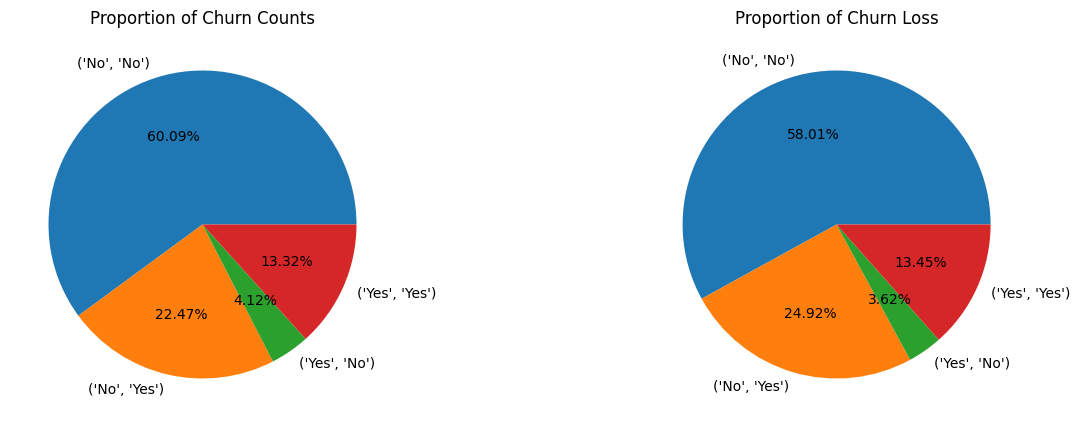

In [37]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax = axes[0]
axes[0].set_title("Proportion of Churn Counts")
churn_cnt = ax.pie(df1[df1['Churn']==1].groupby(['Dependents', 'Partner'])['Churn'].value_counts(),
               labels=[('No', 'No'), ('No', 'Yes'), ('Yes', 'No'), ('Yes', 'Yes')],
               autopct='%1.2f%%')

ax = axes[1]
axes[1].set_title("Proportion of Churn Loss")
churn_loss = ax.pie(df1.groupby(['Dependents', 'Partner'])['Loss'].sum() / df1['Loss'].sum(),
               labels=[('No', 'No'), ('No', 'Yes'), ('Yes', 'No'), ('Yes', 'Yes')],
               autopct='%1.2f%%')
plt.show()

### 가입한 서비스

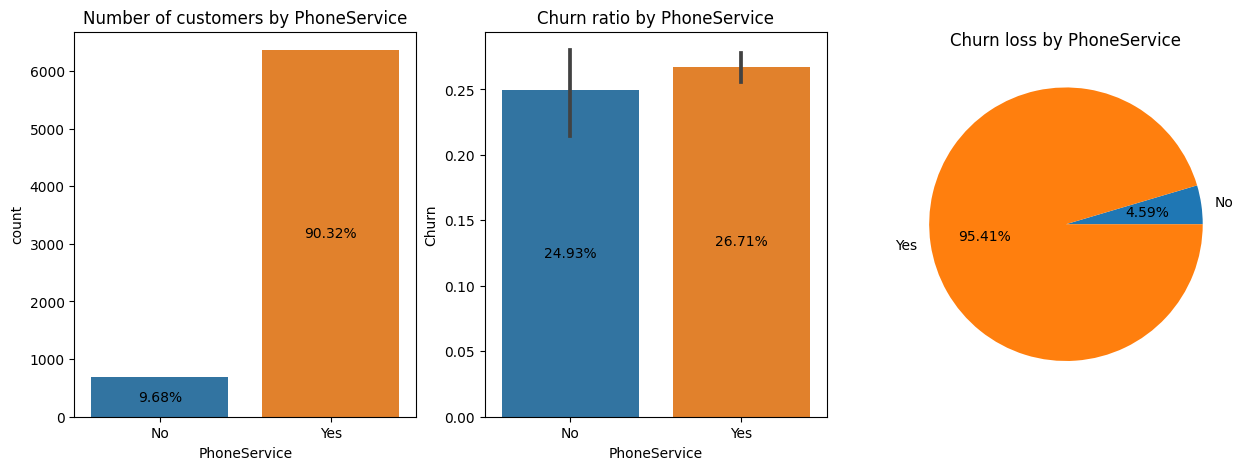

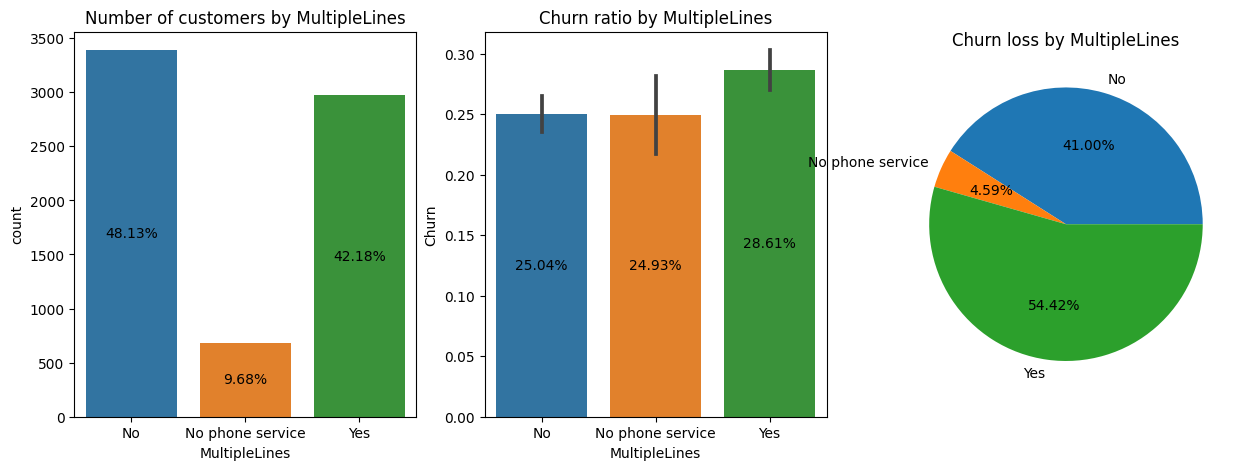

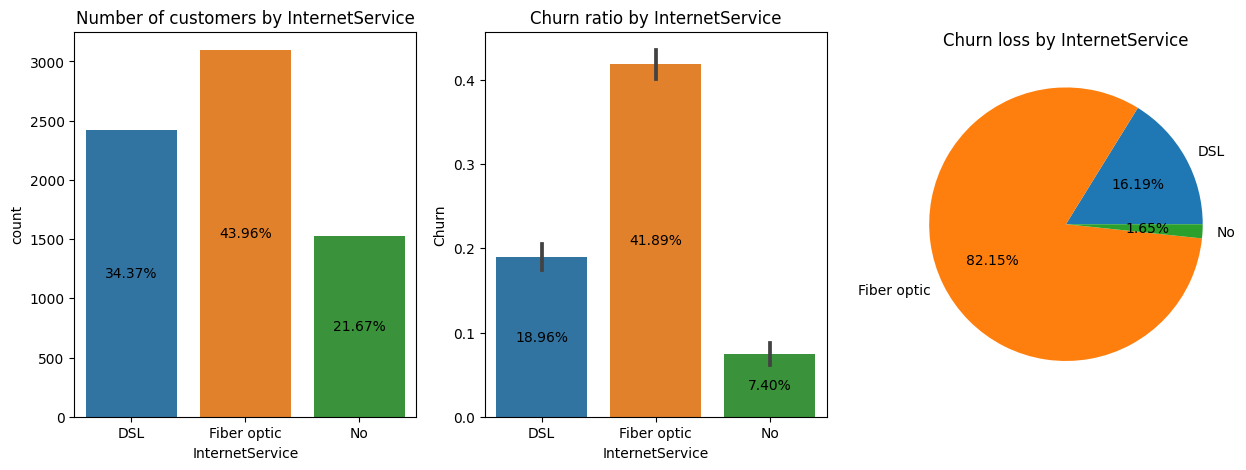

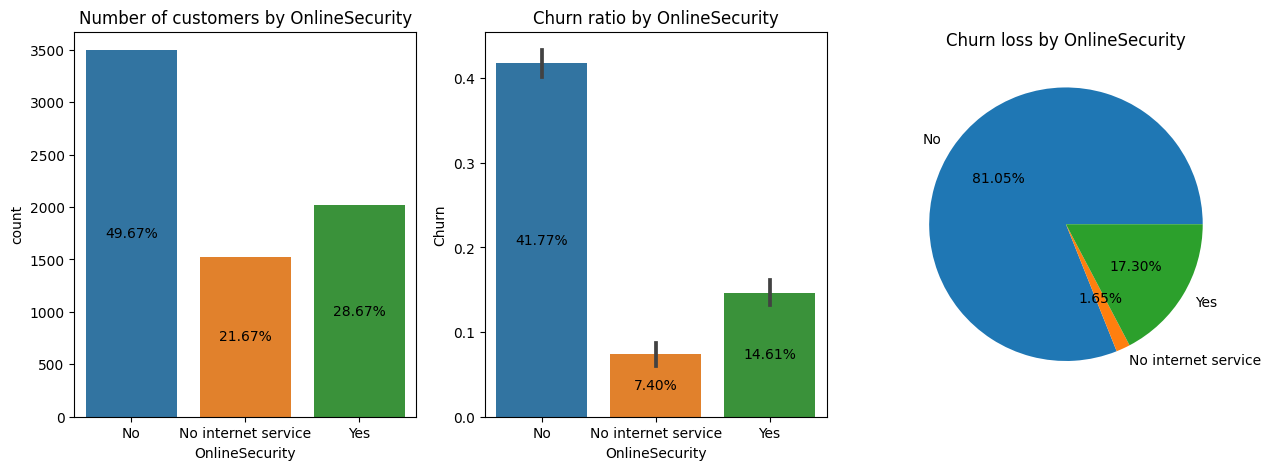

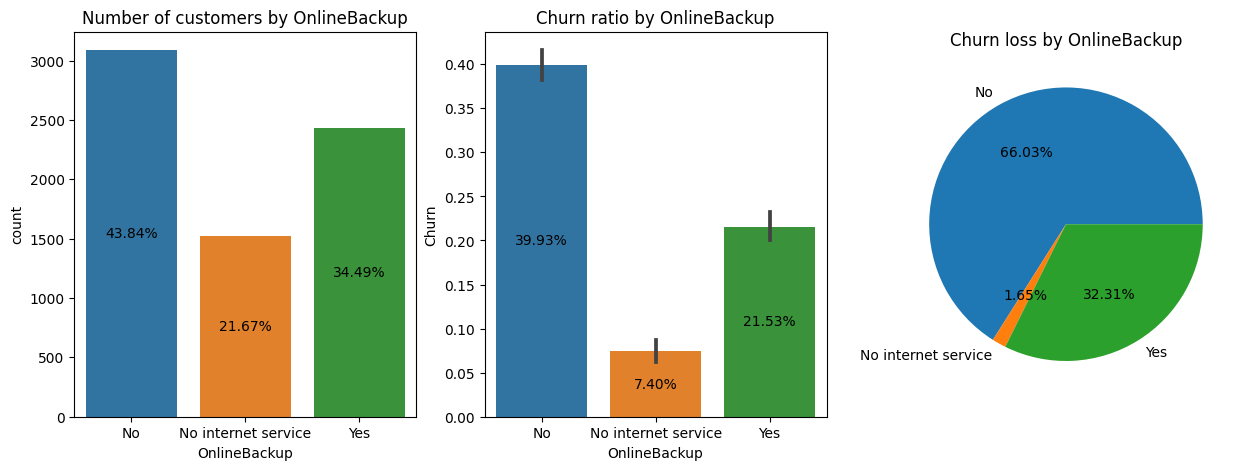

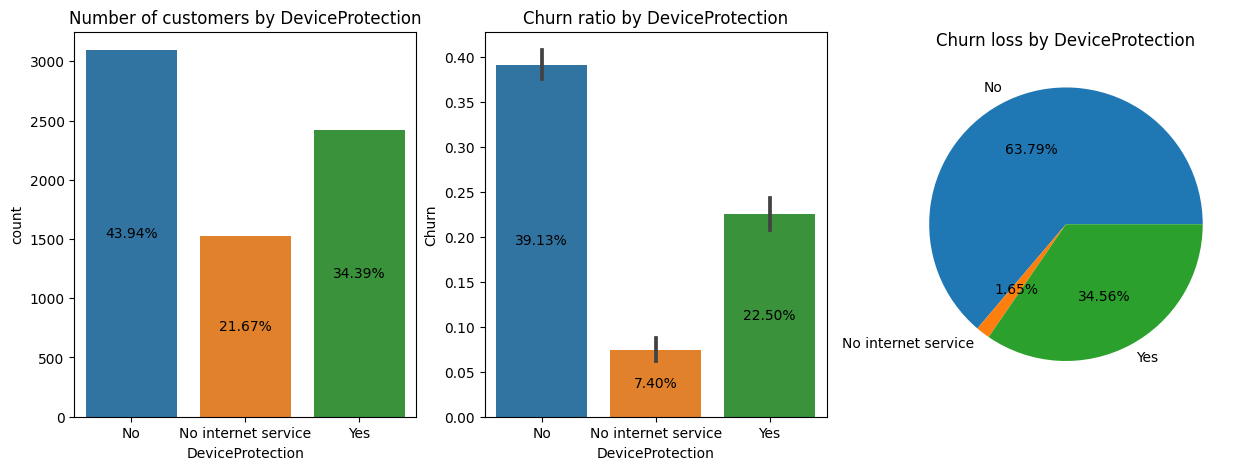

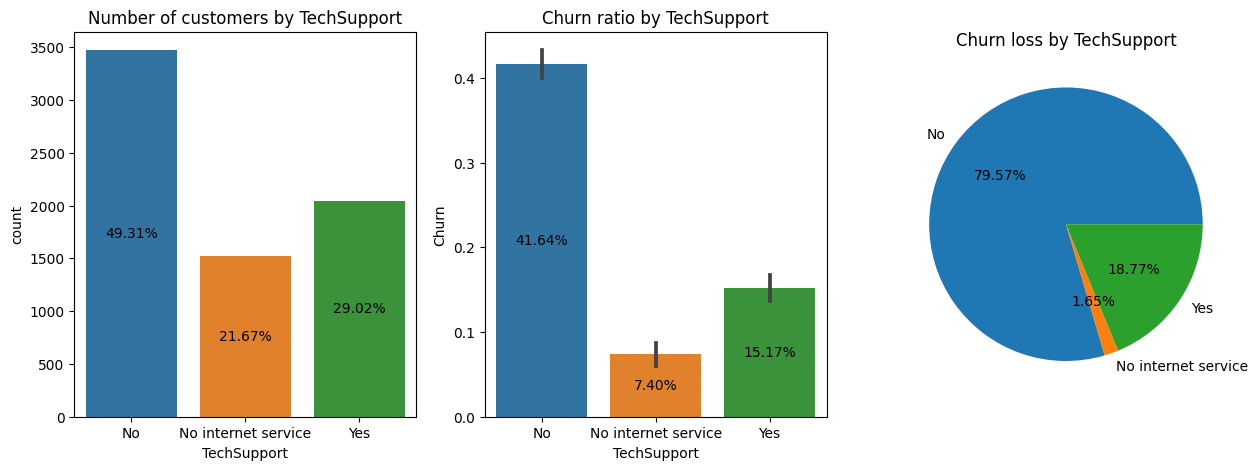

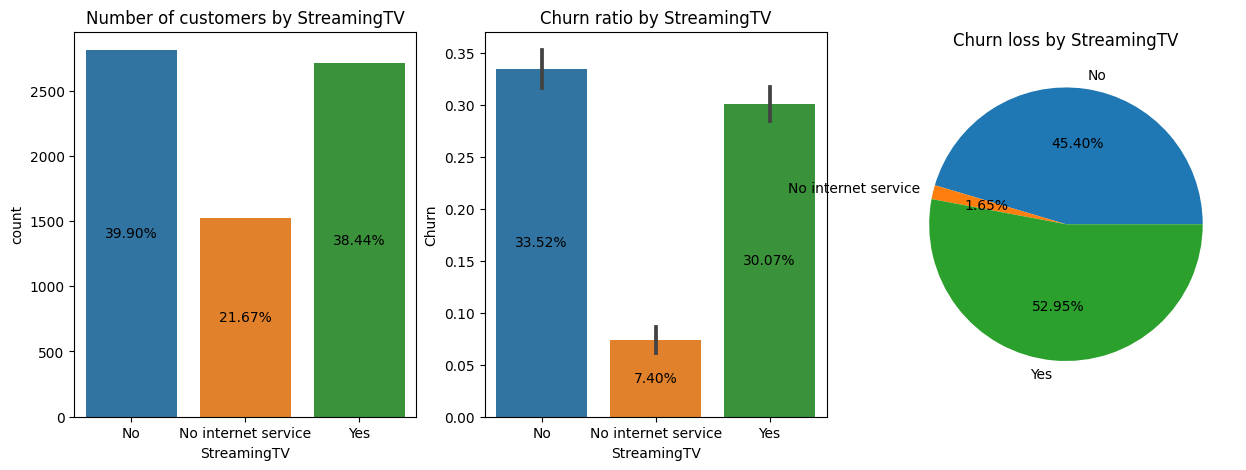

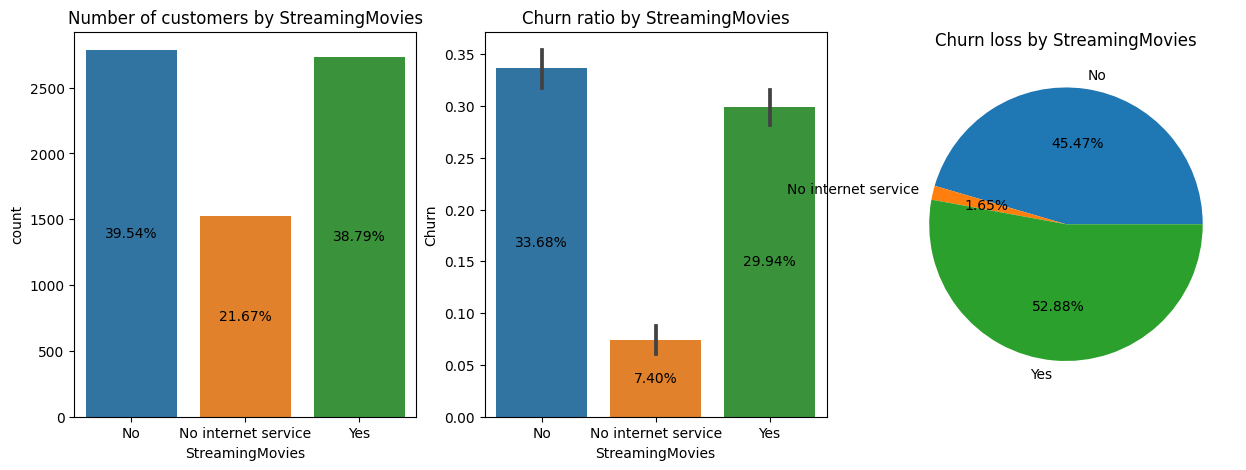

In [38]:
services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
            'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for feature in services :
    eda_cat(feature)

#### PhoneService
- 전화 서비스에 가입한 고객 90%, Churn 비율 27%
- 전화 서비스에 가입하지 않은 고객 10%, Churn 비율 25%
- 전화 서비스에 가입한 고객의 Churn 비율이 약간 더 높음

#### MultipleLines
- 다중회선 가입한 고객 42%, Churn 비율 29%
- 다중회선 미가입 고객 48%, Churn 비율 25%
- 전화서비스 자체에 가입하지 않은 고객 PhoneService에서 확인햇듯 10%
- 다중회선 가입한 고객의 Churn 비율이 약간 더 높음

#### InternetService
- 두 종류의 인터넷 서비스가 있음
- DSL(일반 전화선)에 가입한 고객 34%, Churn 비율 19%
- Fiber optic(광케이블)에 가입한 고객 44%, Churn 비율 42%
- 인터넷 서비스에 가입하지 않은 고객 22%, Churn 비율 7%
    - 이후 인터넷서비스와 관련 있는 다른 서비스에서도 이 비율은 동일함
- Fiber optic으로 가입한 고객의 Churn 비율이 가장 높고 그 다음이 DSL, 마지막이 가입하지 않은 고객

#### OnlineSecurity
- 온라인보안 서비스에 가입한 고객 27%, Churn 비율 15%
- 온라인보안 서비스에 가입하지 않은 고객 50%, Churn 비율 42%
- 가입하지 않은 고객의 Churn 비율이 더 높음

#### OnlineBackup
- 온라인 백업 서비스에 가입 고객 34%, Churn 비율 22%
- 온라인 백업 서비스에 가입하지 않은 고객 44%, Churn 비율 40%
- 가입하지 않은 고객의 Churn 비율이 더 높음

#### DeviceProtection
- 장치 보호 서비스에 가입한 고객 34%, Churn 비율 23%
- 장치 보호 서비스에 가입하지 않은 고객 44%, Churn 비율 39%
- 가입하지 않은 고객의 Churn 비율이 더 높음

#### TechSupport
- 기술 지원 서비스에 가입한 고객 29%, Churn 비율 15%
- 기술 지원 서비스에 가입하지 않은 고객 49%, Churn 비율 42%
- 가입하지 않은 고객의 Churn 비율이 더 높음

#### StreamingTV
- TV 스트리밍 서비스에 가입한 고객 38%, Churn 비율 30%
- TV 스트리밍 서비스에 가입하지 않은 고객 40%, Churn 비율 34%
- 가입하지 않은 고객의 Churn 비율이 약간 더 높음

#### StreamingMovies
- 영화 스트리밍 서비스에 가입한 고객 39%, Churn 비율 30%
- 영화 스트리밍 서비스 가입하지 않은 고객 40%, Churn 비율 34%
- 가입하지 않는 고객의 Churn 비율이 약간 더 높음

#### Internet  관련 서비스
- 전반적으로 Internet 관련 서비스에 가입하지 않은 고객의 Churn 비율이 높음
- 특히, Fiber optic에 가입했다면 Churn 비율 더 높음

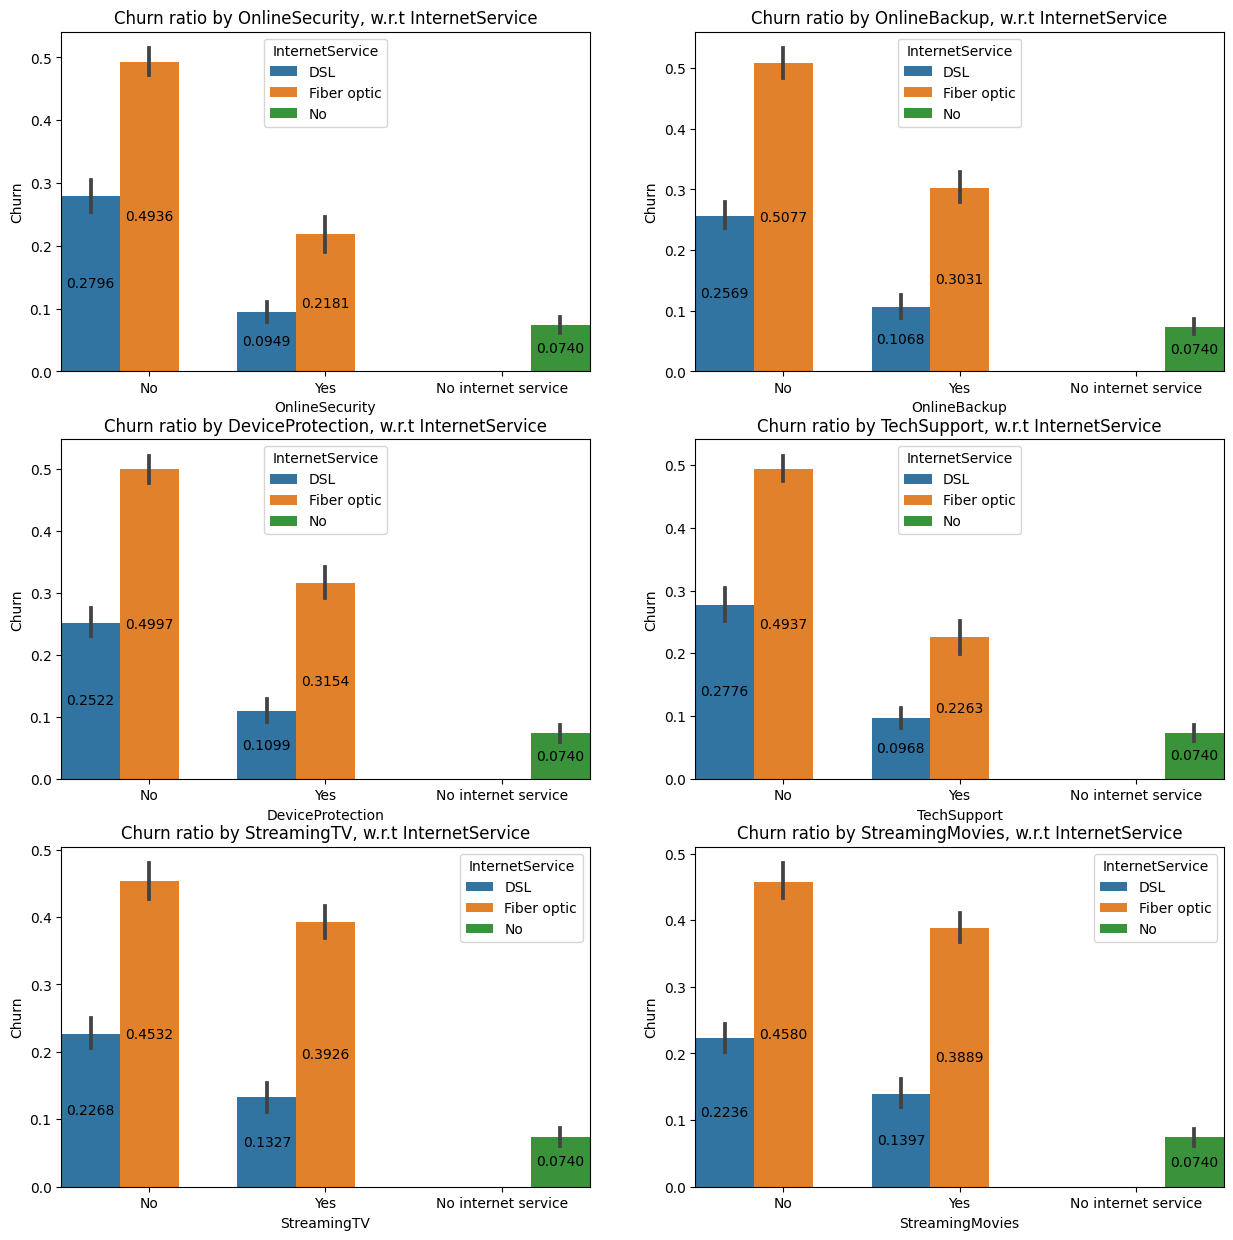

In [39]:
internet_services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                     'StreamingTV', 'StreamingMovies']
fig = plt.figure(figsize=(15, 15))
for i in range(3) :
    for j in range(1, 3) :
        feature = internet_services[2*i+j-1]
        ax = fig.add_subplot(320+2*i+j)
        ax = sns.barplot(data=df1, x=feature, y='Churn', hue='InternetService',
                         order=["No", "Yes", "No internet service"], width=1)
        ax.set_title(f"Churn ratio by {feature}, w.r.t InternetService")
        for k in range(3) :
            ax.bar_label(ax.containers[k], fmt='%.4f', label_type='center')

#### 가입한 서비스의 개수에 따른 차이
- Churn 비율은 가입한 서비스가 1개일 때 최대
- Loss 는 0개, 1개, 2개, 3개까지 비슷

In [28]:
def cnt_internet_service(row) :
    cnt = 0
    for i in row[9:15] :
        if i == 'Yes' :
            cnt += 1
    return cnt
df1['cnt_int'] = 0
df1['cnt_int'] = df1.apply(cnt_internet_service, axis=1)
df1['cnt_int']

0       1
1       2
2       2
3       3
4       0
       ..
7038    5
7039    4
7040    1
7041    0
7042    5
Name: cnt_int, Length: 7043, dtype: int64

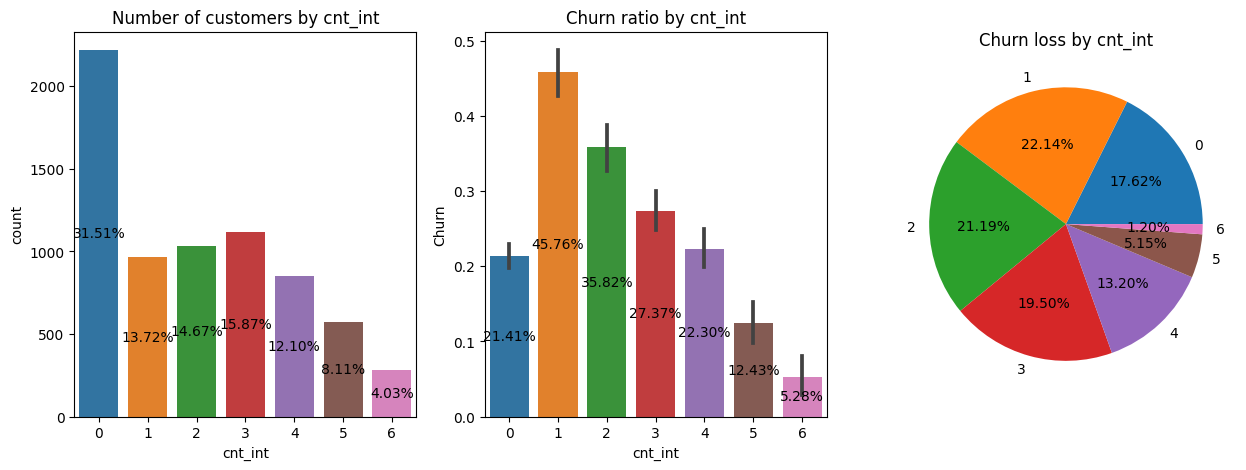

In [33]:
eda_cat('cnt_int')

### 요금 납부

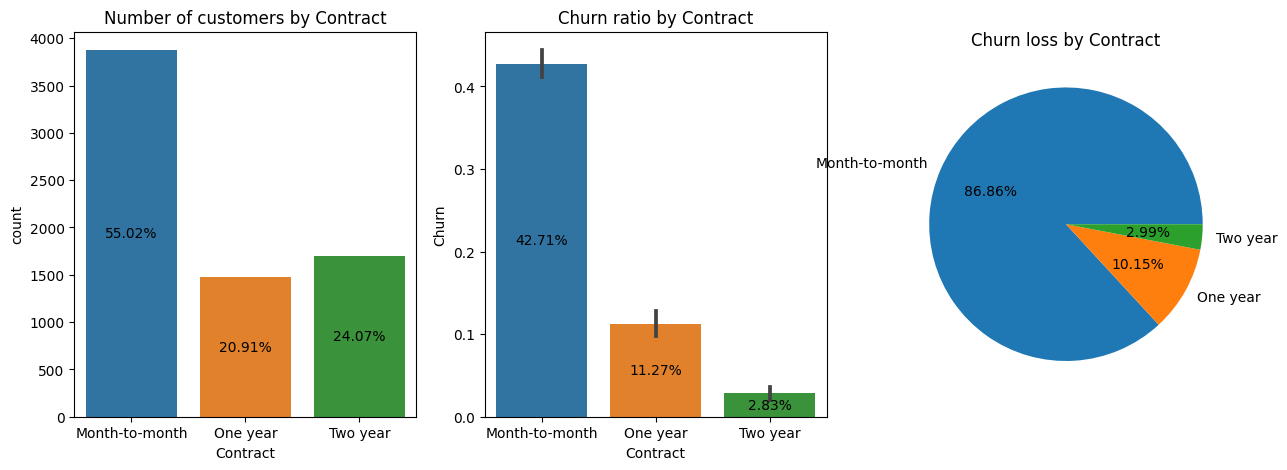

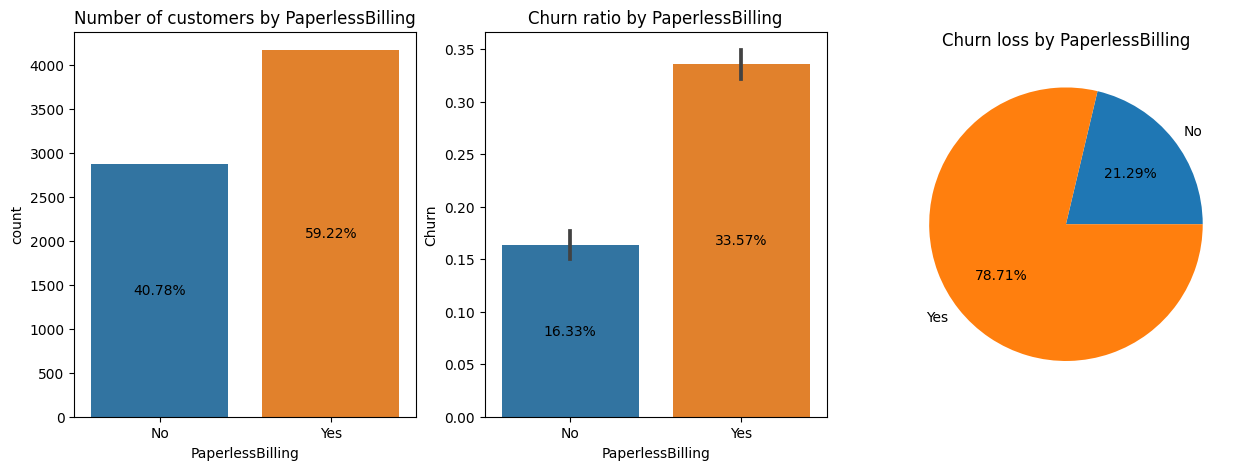

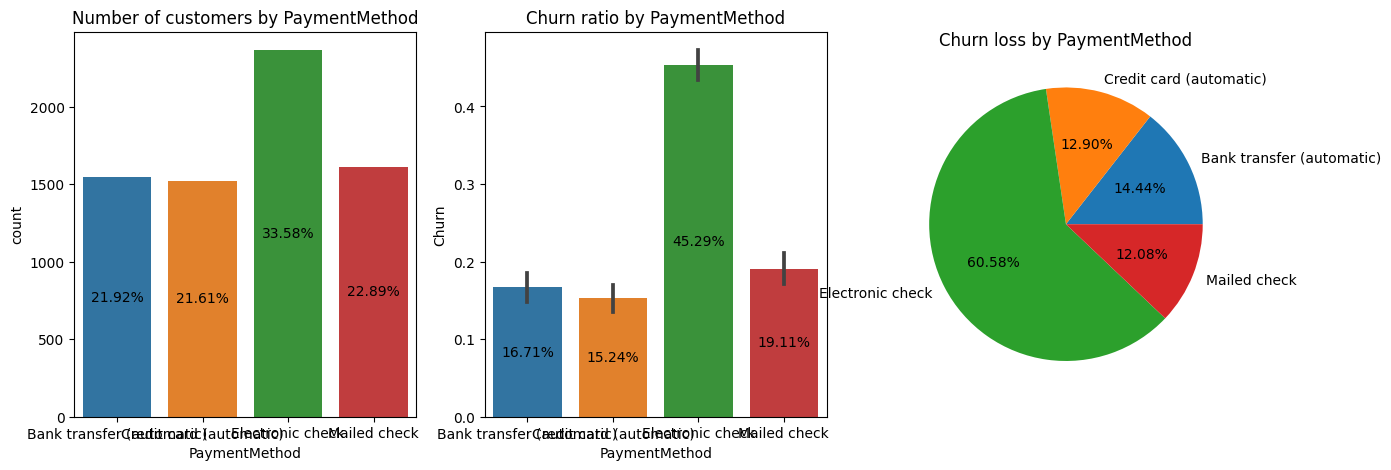

In [34]:
billings = ['Contract', 'PaperlessBilling', 'PaymentMethod']
for feature in billings :
    eda_cat(feature)

#### Contract
- 계약 종류로 3가지 있음
- 매달 계약을 갱신하는 고객 55%, Churn 비율 43%
- 년 단위로 게약을 갱신하는 고객 21%이며, Churn 비율 11%
- 이년 단위로 계약을 갱신하는 고객 24%이며, Churn 비율은 3%
- 갱신 간격이 짧을수록 Churn 비율이 높음

#### PaperlessBilling
- 종이 청구서를 수령하지 않는 고객 약 59%, Churn 비율 36%
- 종이 청구서를 수령하는 고객 약 41%, Churn 비율 16%
- 종이 청구서를 수령하지 않는 고객의 Churn 비율이 더 높음

#### PaymentMethod
- 네가지 요금 납부 방법
- 은행 자동이체 하는 고객 약 22%, Churn비율 17%
- 신용카드로 자동결제 하는 고객 약 22%, Churn 비율 15%
- 전자수표로 납부하는 고객 약 34%, Churn 비율 45%
- 수표를 우편으로 보내서 납부하는 고객 약 23%, Churn 비율 19%
- 전자수표로 납부하는 고객의 Churn 비율이 가장 높고, 다음이 우편 수표, 은행 자동이체, 신용카드 순서

### 연속형 변수
- TotalCharges는 MonthlyCharges에 가입 기간인 tenure을 곱한 값과 거의 동일

In [58]:
np.corrcoef(df1['TotalCharges'], df1['MonthlyCharges'] * df1['tenure'])

array([[1.        , 0.99956055],
       [0.99956055, 1.        ]])

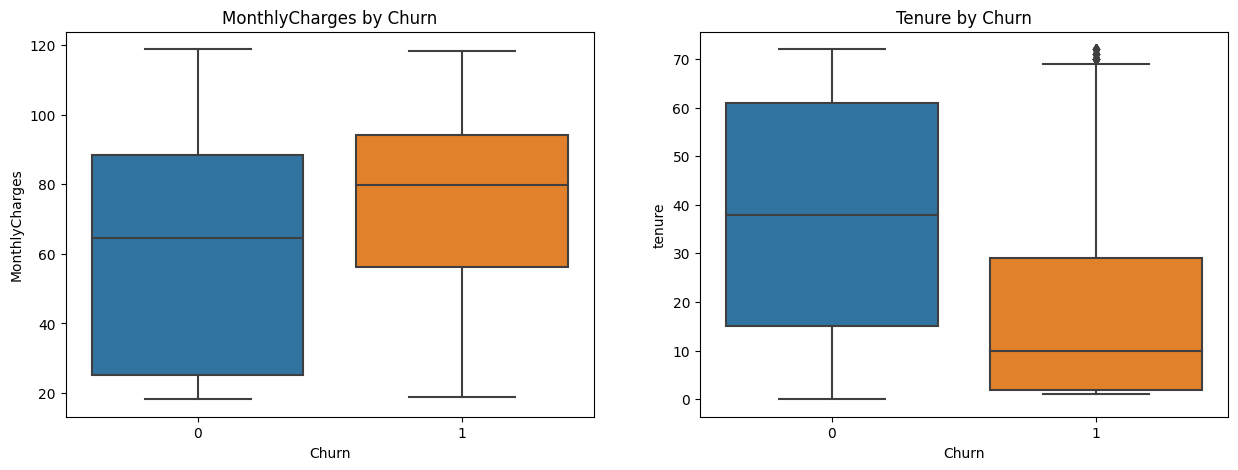

In [56]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
axes[0].set_title("MonthlyCharges by Churn")
sns.boxplot(data=df1, x='Churn', y='MonthlyCharges', ax=axes[0])
axes[1].set_title("Tenure by Churn")
sns.boxplot(data=df1, x='Churn', y='tenure', ax=axes[1])
plt.show()

#### 연속형 변수 범주화
- MonthlyCharge와 tenure 변수를 4분위 수 기준 4개의 범주로 나눈 새로운 변수 생성

In [153]:
bins_charges = df1['MonthlyCharges'].describe().iloc[3:]
bins_charges.loc['min'] -= 1
bins_charges

min     17.25
25%     35.50
50%     70.35
75%     89.85
max    118.75
Name: MonthlyCharges, dtype: float64

In [154]:
df1['bin_charges'] = pd.cut(df1['MonthlyCharges'], bins=bins_charges, labels=[1, 2, 3, 4])
df1['bin_charges']

0       1
1       2
2       2
3       2
4       3
       ..
7038    3
7039    4
7040    1
7041    3
7042    4
Name: bin_charges, Length: 7043, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]

In [155]:
bins_tenure = df1['tenure'].describe().iloc[3:]
bins_tenure.loc['min'] -= 1
bins_tenure

min    -1.0
25%     9.0
50%    29.0
75%    55.0
max    72.0
Name: tenure, dtype: float64

In [156]:
df1['bin_tenure'] = pd.cut(df1['tenure'], bins=bins_tenure, labels=[1, 2, 3, 4])
df1['bin_tenure']

0       1
1       3
2       1
3       3
4       1
       ..
7038    2
7039    4
7040    2
7041    1
7042    4
Name: bin_tenure, Length: 7043, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]

#### MonthlyCharges (범주화)
- 납부 요금이 가장 적은 1그룹의 Churn 비율 11%로 가장 낮음
- 2그룹의 Churn 비율 24%로 평균 수준
- 3그룹과 4그룹은 각각 Churn 비율 37%, 32%로 높은 편
- 전체 Loss에서 차지하는 비중은 3그룹 38%, 4그룹 41%

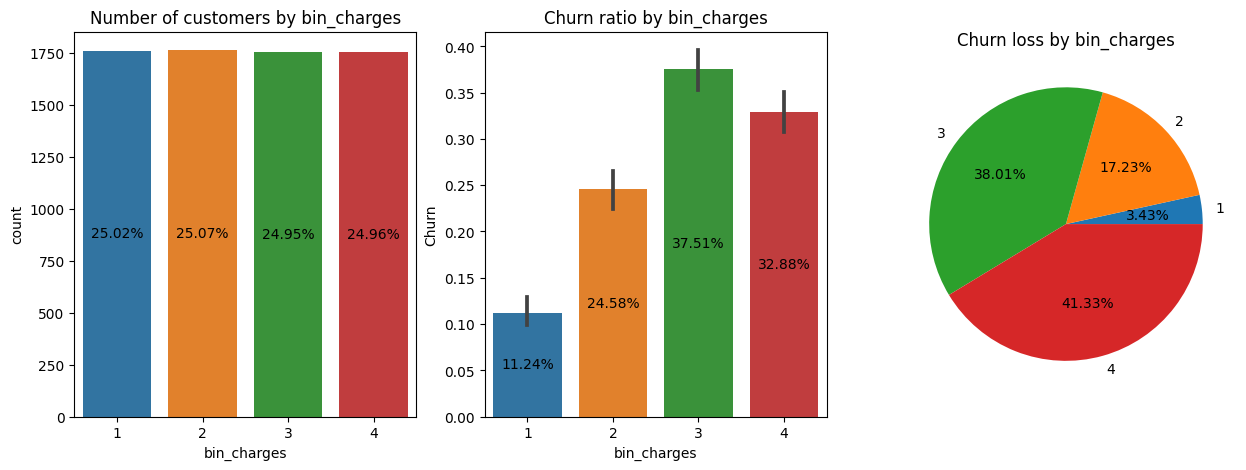

In [157]:
eda_cat('bin_charges')

#### tenure (범주화)
- 가입 기간이 가장 짧은 1그룹의 Churn 비율 49%로 매우 높음
- 2그룹의 Churn 비율 28%로 평균 수준
- 3그룹의 Churn 비율 18%, 4그룹의 Churn 비율 7%로 낮은 편
- 전체 Loss에서 차지하는 비중은 1, 2, 3, 4 그룹 순

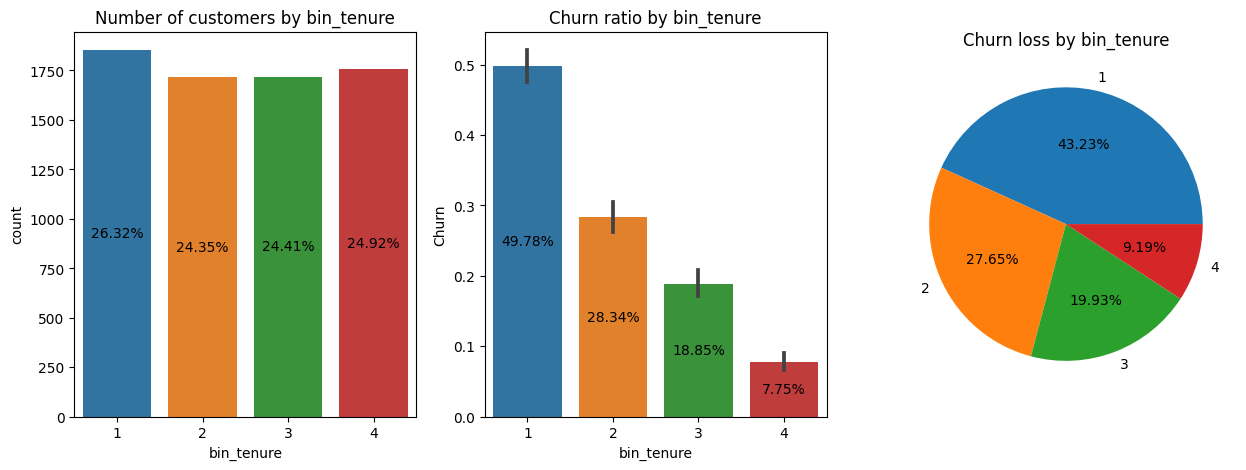

In [158]:
eda_cat('bin_tenure')

#### MonthlyCharges와 tenure 관계

- 모든 MonthlyCharges 구간에서 가입 기간이 가장 짧은 고객의 Churn 비율이 가장 높음

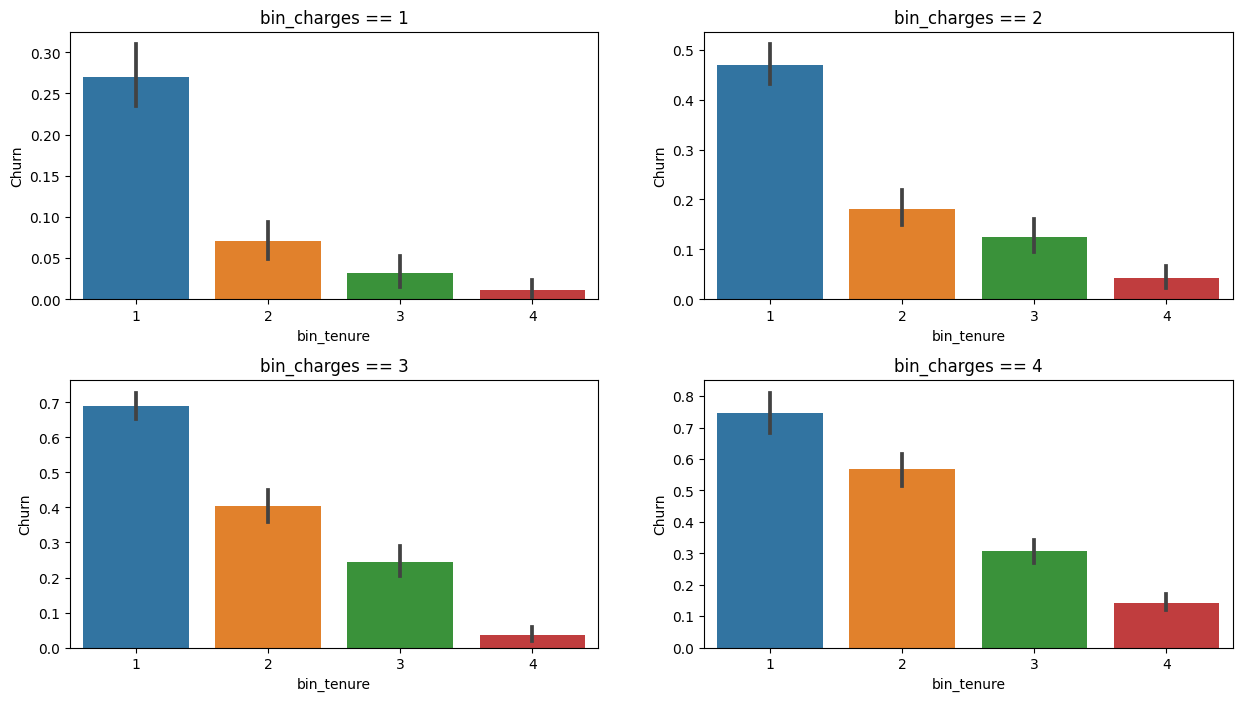

In [171]:
fig = plt.figure(figsize=(15, 8))
plt.subplots_adjust(hspace=0.3)
for i in range(2) :
    for j in range(1, 3) :
        ax = fig.add_subplot(220+2*i+j)
        ax = sns.barplot(data=df1[df1['bin_charges']==2*i+j],
                    x='bin_tenure', y='Churn')
        ax.set_title(f"bin_charges == {2*i+j}")

- 모든 tenure 그룹에서 납부 금액이 가장 많은 그룹의 Churn 비율이 가장 높음
- tenure에 따라 나누지 않은 경우엔 MonthlyCharges 3그룹의 Churn 비율이 가장 높았던 결과와는 다름

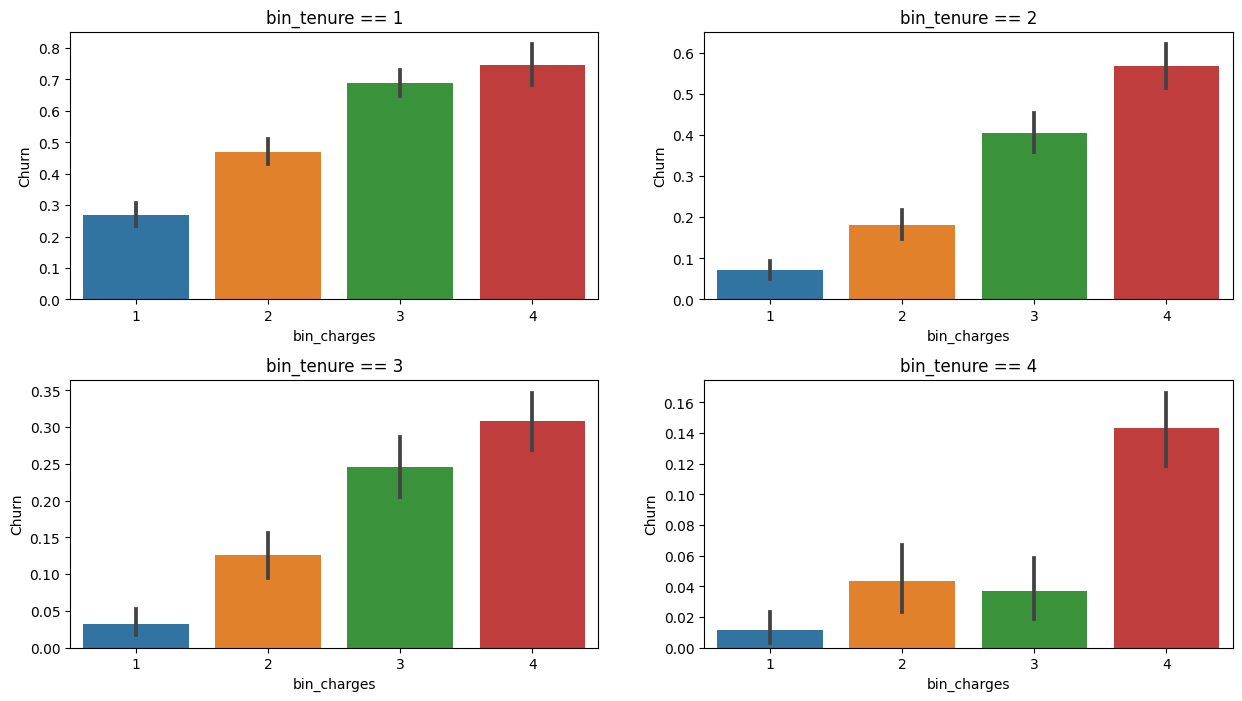

In [173]:
fig = plt.figure(figsize=(15, 8))
plt.subplots_adjust(hspace=0.3)
for i in range(2) :
    for j in range(1, 3) :
        ax = fig.add_subplot(220+2*i+j)
        ax = sns.barplot(data=df1[df1['bin_tenure']==2*i+j],
                    x='bin_charges', y='Churn')
        ax.set_title(f"bin_tenure == {2*i+j}")

#### 가입한 서비스 개수와의 관계

- bin_charges 1그룹은 가입한 서비스가 0~2개
- bin_charges 2부터 4그룹까지는 가입한 서비스가 적을 수록 Churn 비율 높음

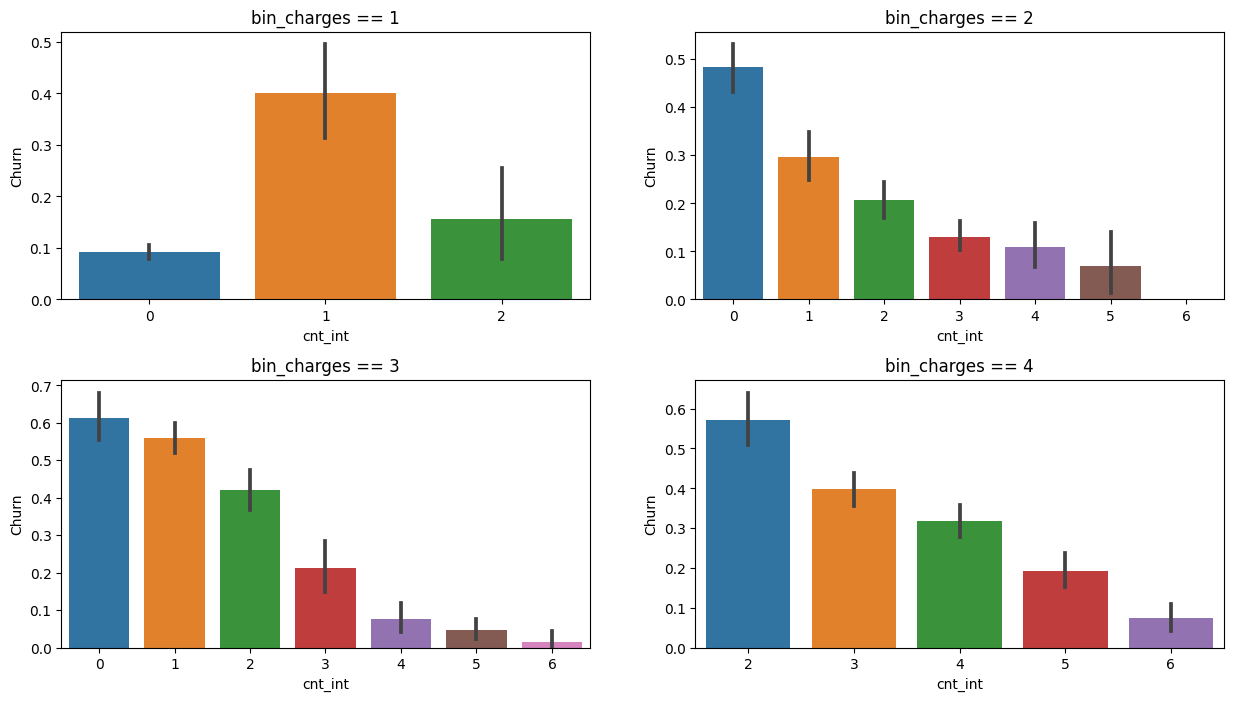

In [159]:
fig = plt.figure(figsize=(15, 8))
plt.subplots_adjust(hspace=0.3)
for i in range(2) :
    for j in range(1, 3) :
        ax = fig.add_subplot(220+2*i+j)
        ax = sns.barplot(data=df1[df1['bin_charges']==2*i+j],
                    x='cnt_int', y='Churn')
        ax.set_title(f"bin_charges == {2*i+j}")

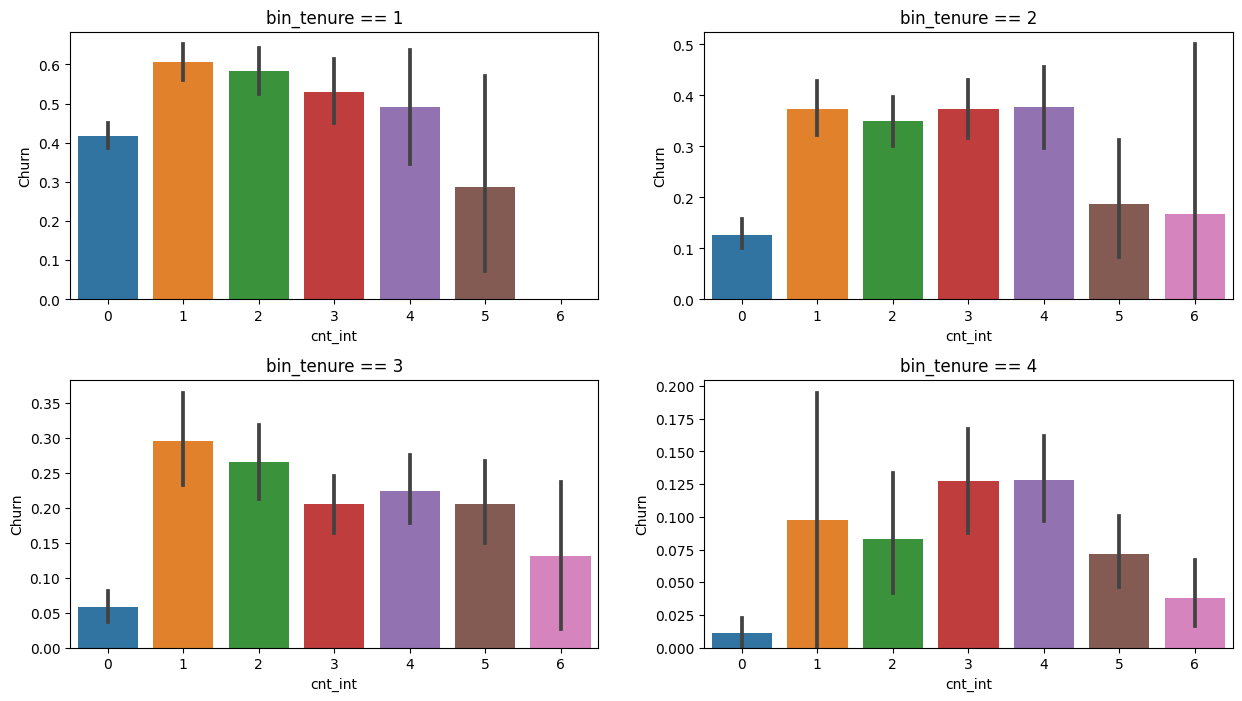

In [160]:
fig = plt.figure(figsize=(15, 8))
plt.subplots_adjust(hspace=0.3)
for i in range(2) :
    for j in range(1, 3) :
        ax = fig.add_subplot(220+2*i+j)
        ax = sns.barplot(data=df1[df1['bin_tenure']==2*i+j],
                    x='cnt_int', y='Churn')
        ax.set_title(f"bin_tenure == {2*i+j}")

#### Dependents, Partner에 따른 MonthlyCharges
- 둘 다 없는 그룹(No, No) 중 MonthlyCharges 3, 4 그룹의 Churn 비율 높음

<AxesSubplot: ylabel='Dependents,Partner,bin_charges'>

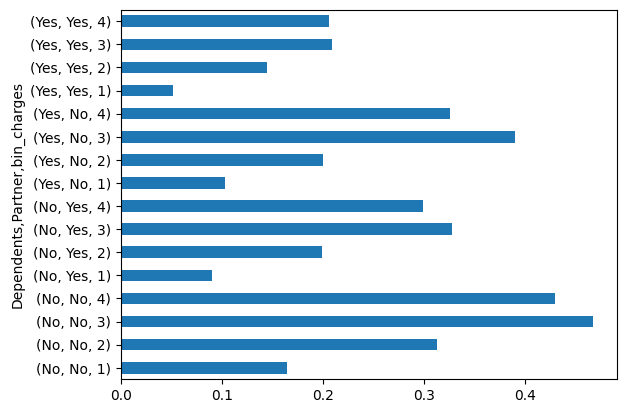

In [178]:
df1.groupby(['Dependents', 'Partner', 'bin_charges'])['Churn'].mean().plot(kind='barh')

<AxesSubplot: ylabel='Dependents,Partner,bin_tenure'>

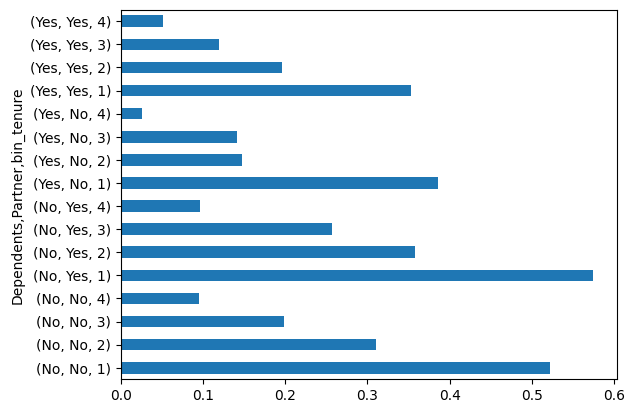

In [183]:
df1.groupby(['Dependents', 'Partner', 'bin_tenure'])['Churn'].mean().plot(kind='barh')

In [188]:
df1[(df1['Dependents']=='No') & (df1['Partner']=='No')].groupby(['bin_charges', 'bin_tenure'])['Churn'].mean()

bin_charges  bin_tenure
1            1             0.306818
             2             0.082251
             3             0.022059
             4             0.023810
2            1             0.497674
             2             0.187500
             3             0.142012
             4             0.051282
3            1             0.676240
             2             0.444000
             3             0.241176
             4             0.036585
4            1             0.765217
             2             0.593023
             3             0.318182
             4             0.178571
Name: Churn, dtype: float64